#### CplAE_MET effect of hyperparam on the reconstruction loss

In this notebook, we will compute the reconstruction loss for separate autoencoders as well as coupled autoencoders to see how much we are scarifycing the recosntruction by coupling and aligning the representations. For this we ran a TAE, EAE, MAE, MEAE separately and compute the losses for 5 independent runs (folds). Then we take some hyperparams that were obtained during the optimization and run a coupled autoencoder with those hyperparameters. To check how much this optimization affect and how much tunning the lambdas changes the results we will compare an OK set of lambdas with the Best set of lambdas that we obtained so far.

In [1]:
import os
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from cplAE_MET.utils.utils import loadpkl
from cplAE_MET.utils.plots import plot_z_3d
from cplAE_MET.models.bayesian_optimization import Leiden_community_detection

/home/fahimehb/miniconda3/envs/cplae_met/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'graph_tool', 'infomap', 'wurlitzer'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [2]:
from cplAE_MET.models.torch_utils import MET_dataset
from cplAE_MET.utils.dataset import MET_exc_inh

In [2]:
def print_ncomm(output):
    is_t_1d = output['is_t_1d']
    is_m_1d = output['is_m_1d']
    is_e_1d = output['is_e_1d']
    is_et_1d = np.logical_and(is_e_1d, is_t_1d)
    is_mt_1d = np.logical_and(is_m_1d, is_t_1d)
    is_me_1d = np.logical_and(is_m_1d, is_e_1d)
    is_met_1d = np.logical_and(is_t_1d, is_me_1d)

    print("Number of t comms:", Leiden_community_detection(output['zt'][is_t_1d]),
          "     ,E comms:",  Leiden_community_detection(output['ze'][is_et_1d]), 
          "     ,ME comms:", Leiden_community_detection(output['zme_paired'][is_met_1d]),
          "     ,M comms:", Leiden_community_detection(output['zm'][is_mt_1d]))


In [3]:
exp_names = {}
exp_names["separate_AEs"] = "Tonly-Eonly-Monly-autoencoders-14Feb2023"
exp_names["ok_hyperparam_cplAEs"] = "optuna_all_connected_objective_comm_det_max"
exp_names["good_hyperparam_cplAEs"] = "optuna_all_connected_objective_comm_det_10trial_2000epochs_1000runs"

In [4]:
path={}
path["results"] = "/home/fahimehb/Local/new_codes/cplAE_MET/data/results/"
path["separate_AEs"] = path["results"] + exp_names["separate_AEs"] + "/"
path["ok_hyperparam_cplAEs"] =  path["results"] + exp_names["ok_hyperparam_cplAEs"] + "/"
path["good_hyperparam_cplAEs"] = path["results"] + exp_names["good_hyperparam_cplAEs"] + "/"

In [5]:
def get_loss_file_name(exp_name, modality, fold):
    if modality == "M":
        suffix = "XM"
    if modality == "E":
        suffix = "XE"
    if modality == "T":
        suffix = "XT"
    return f'{suffix}_{exp_name}_fold_{fold}.csv'

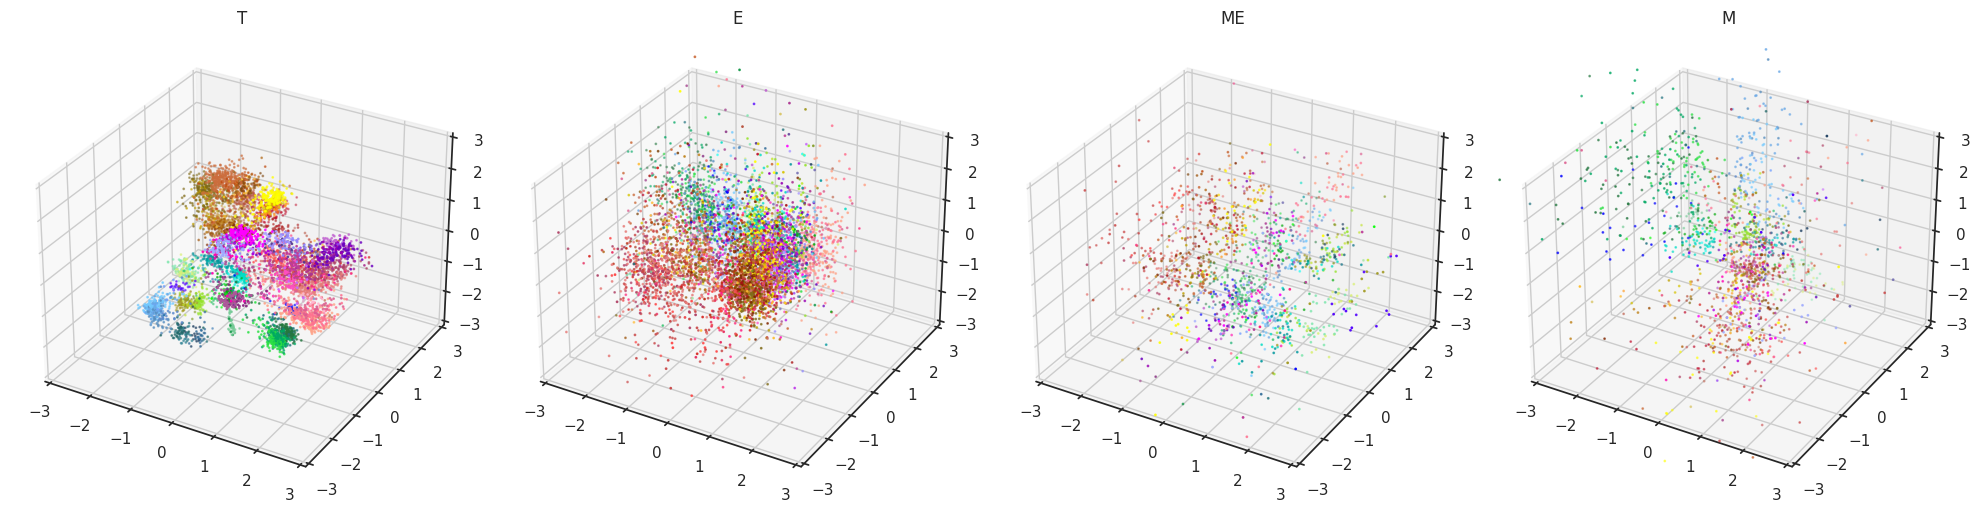

Number of t comms: 24      ,E comms: 23      ,ME comms: 16      ,M comms: 16


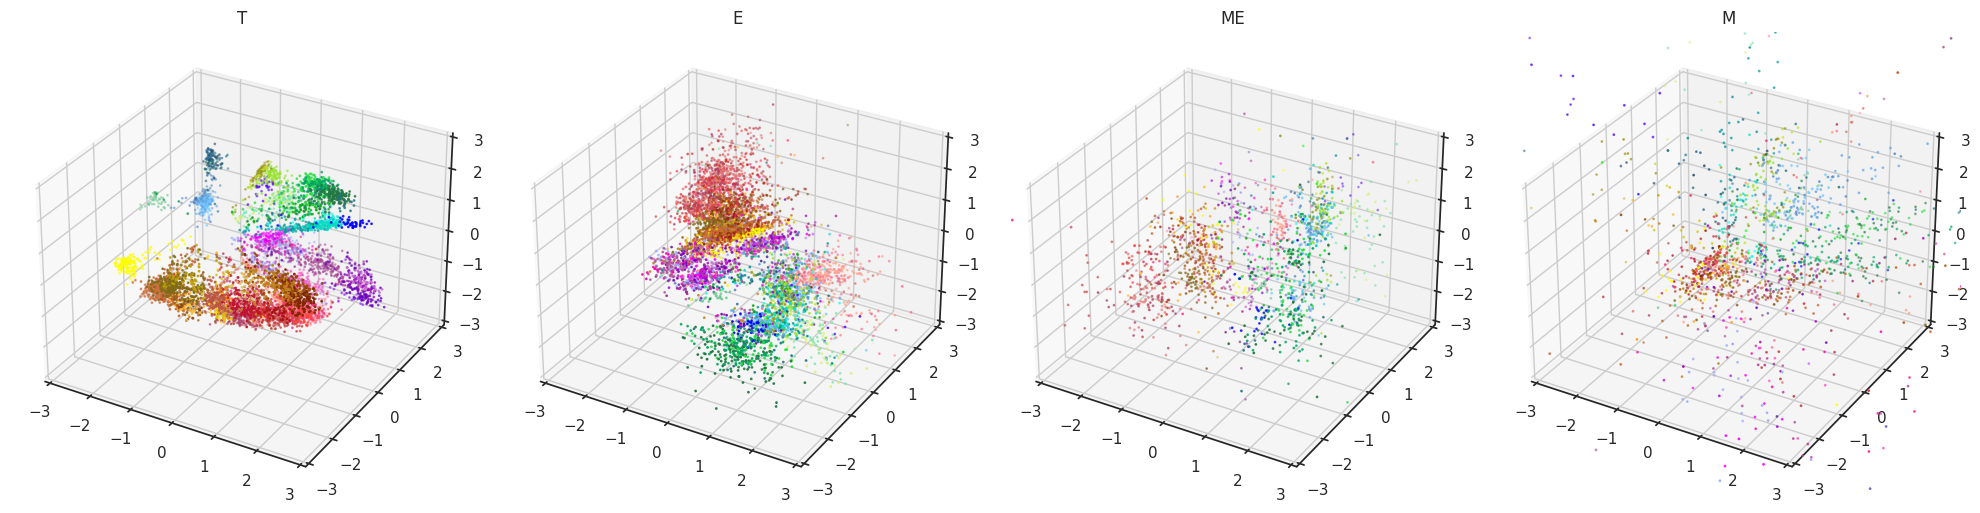

Number of t comms: 29      ,E comms: 22      ,ME comms: 17      ,M comms: 18


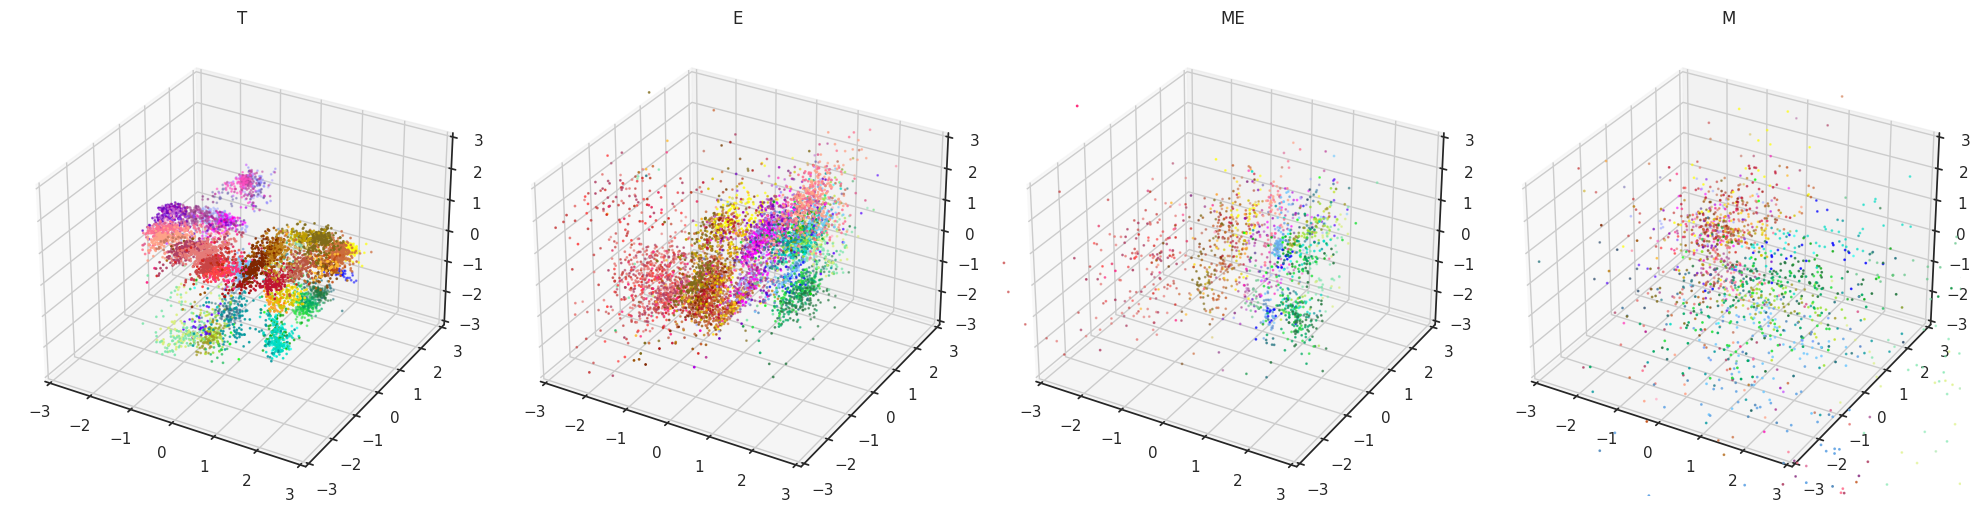

Number of t comms: 26      ,E comms: 21      ,ME comms: 14      ,M comms: 15


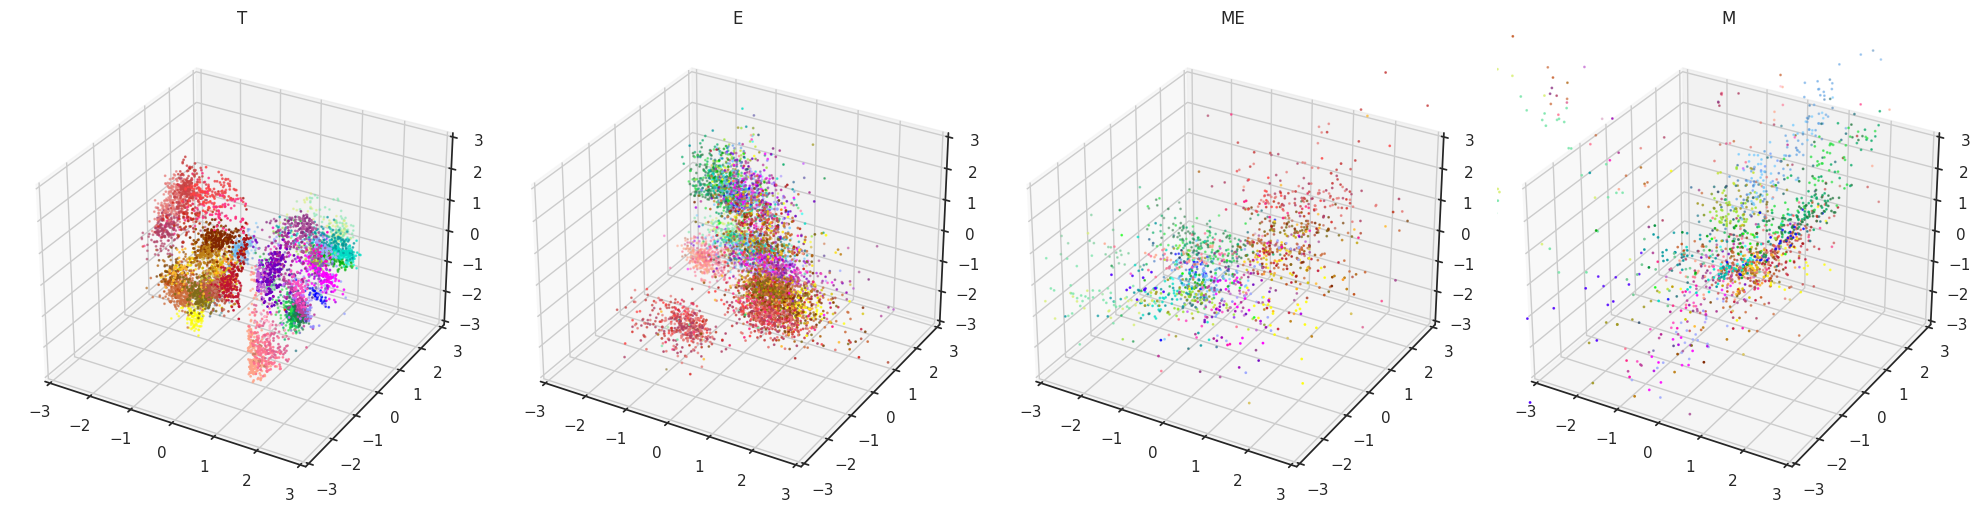

Number of t comms: 31      ,E comms: 17      ,ME comms: 15      ,M comms: 14


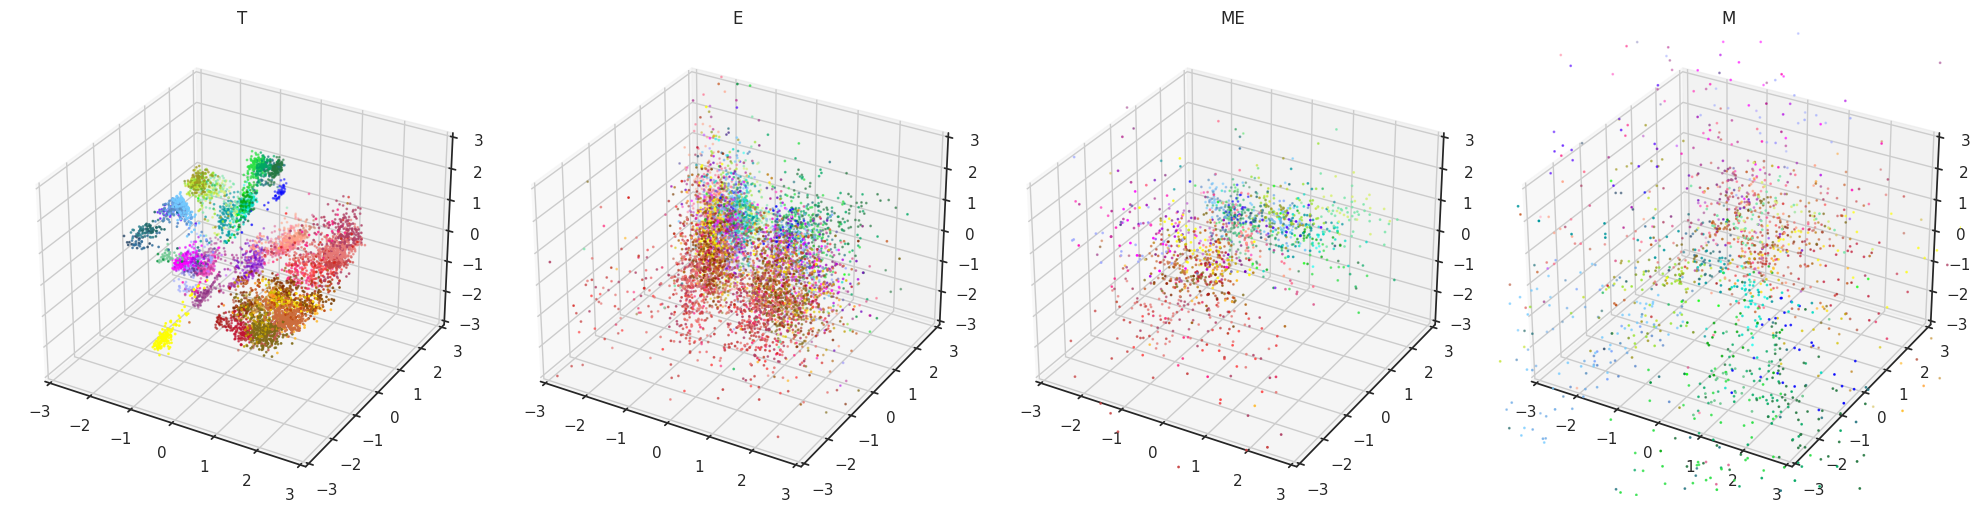

Number of t comms: 29      ,E comms: 22      ,ME comms: 15      ,M comms: 19


In [6]:
for fold in range(5):
    folder = path["separate_AEs"]
    file = f"exit_summary_fold_{fold}_test.pkl"
    dir = os.path.join(folder, file)
    output = loadpkl(dir)
    plot_z_3d(output, xlim=(-3,3), ylim=(-3, 3), zlim=(-3,3))
    print_ncomm(output)

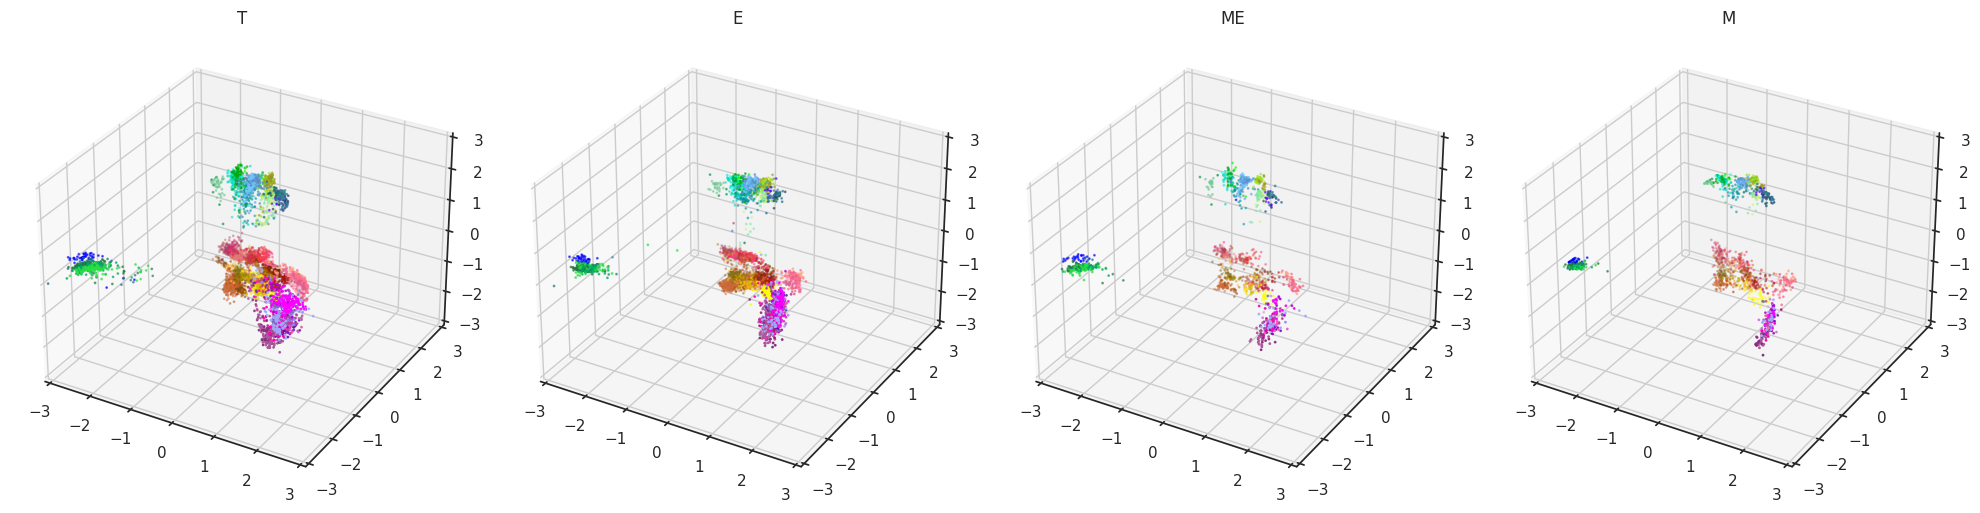

Number of t comms: 26      ,E comms: 24      ,ME comms: 20      ,M comms: 17


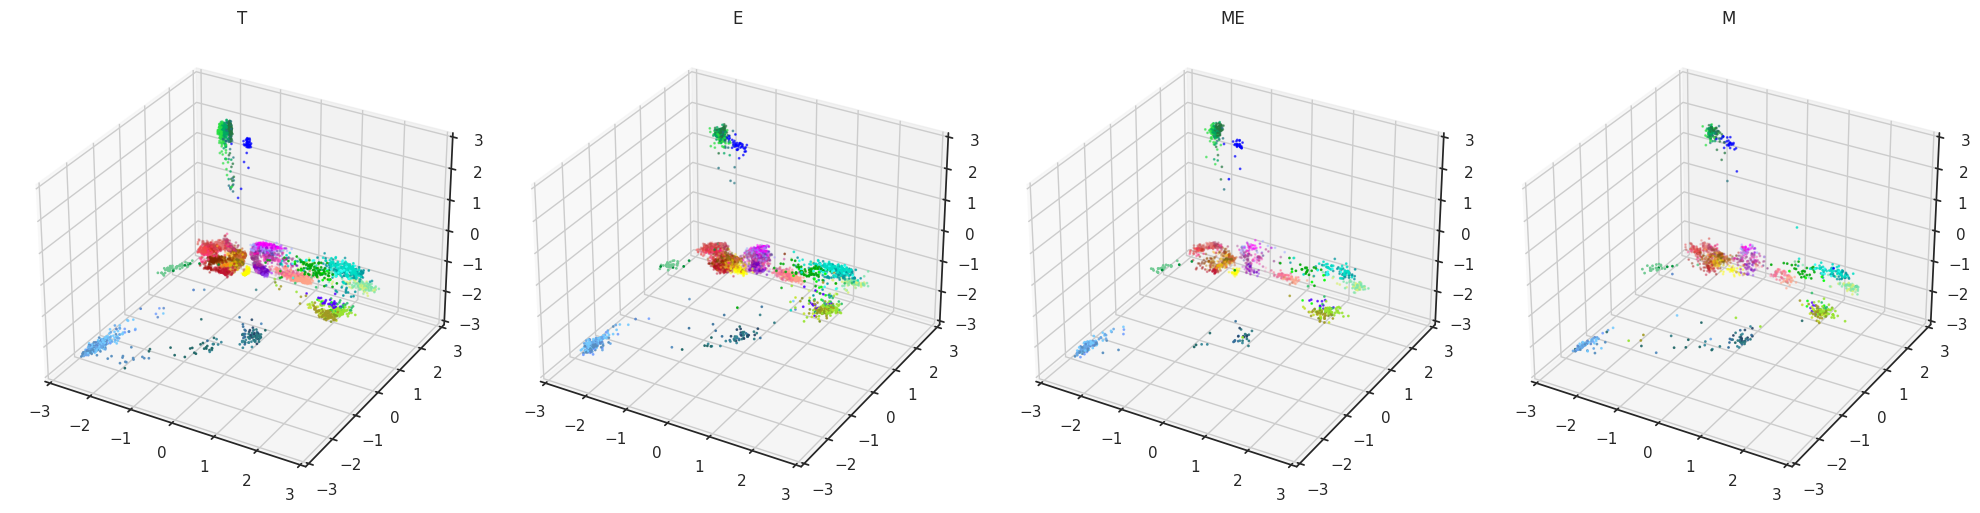

Number of t comms: 30      ,E comms: 23      ,ME comms: 19      ,M comms: 18


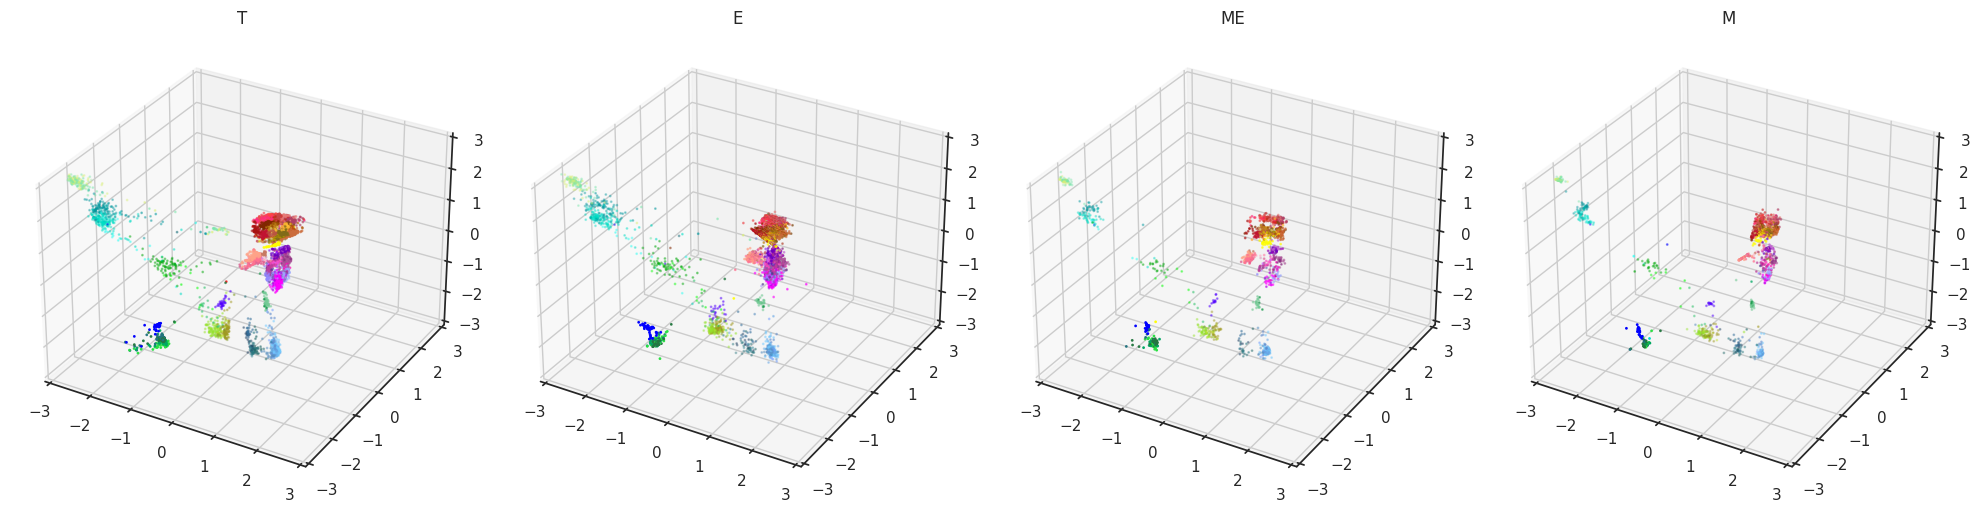

Number of t comms: 30      ,E comms: 27      ,ME comms: 19      ,M comms: 22


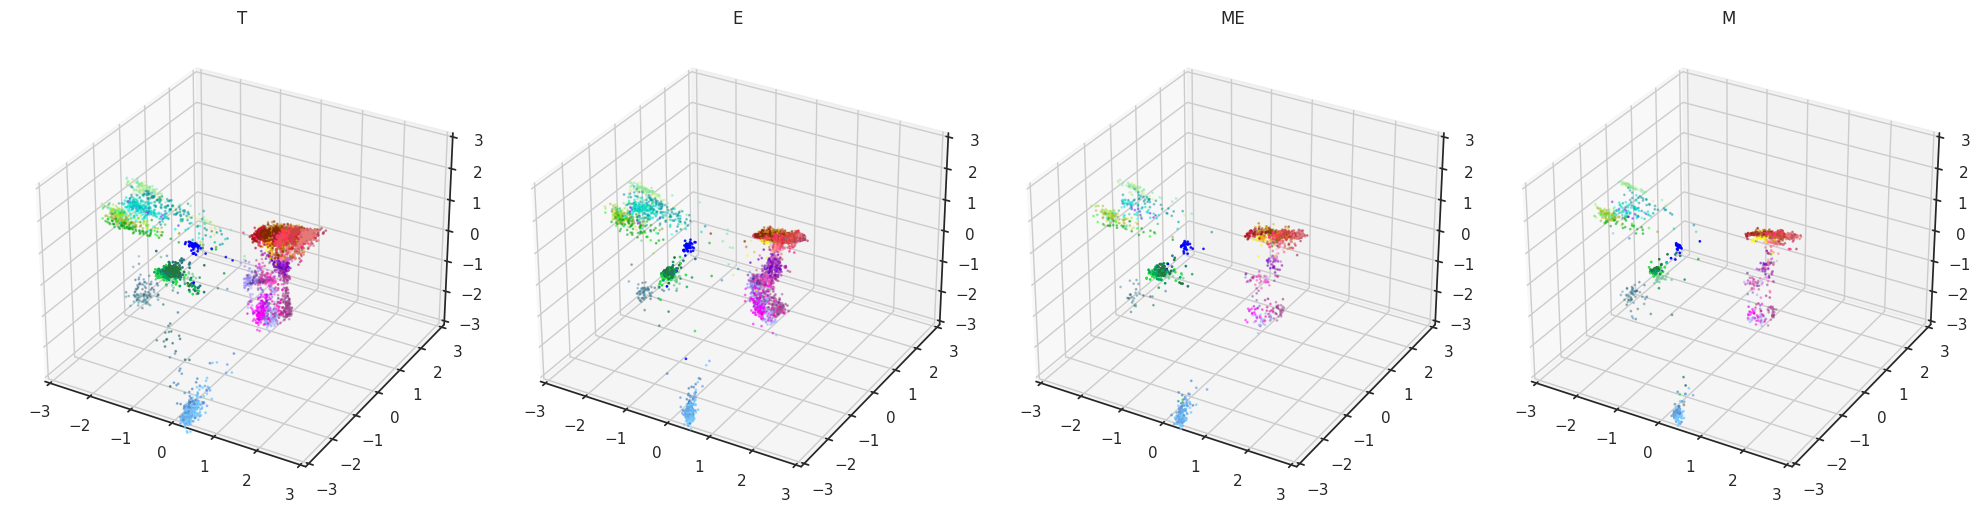

Number of t comms: 26      ,E comms: 22      ,ME comms: 19      ,M comms: 16


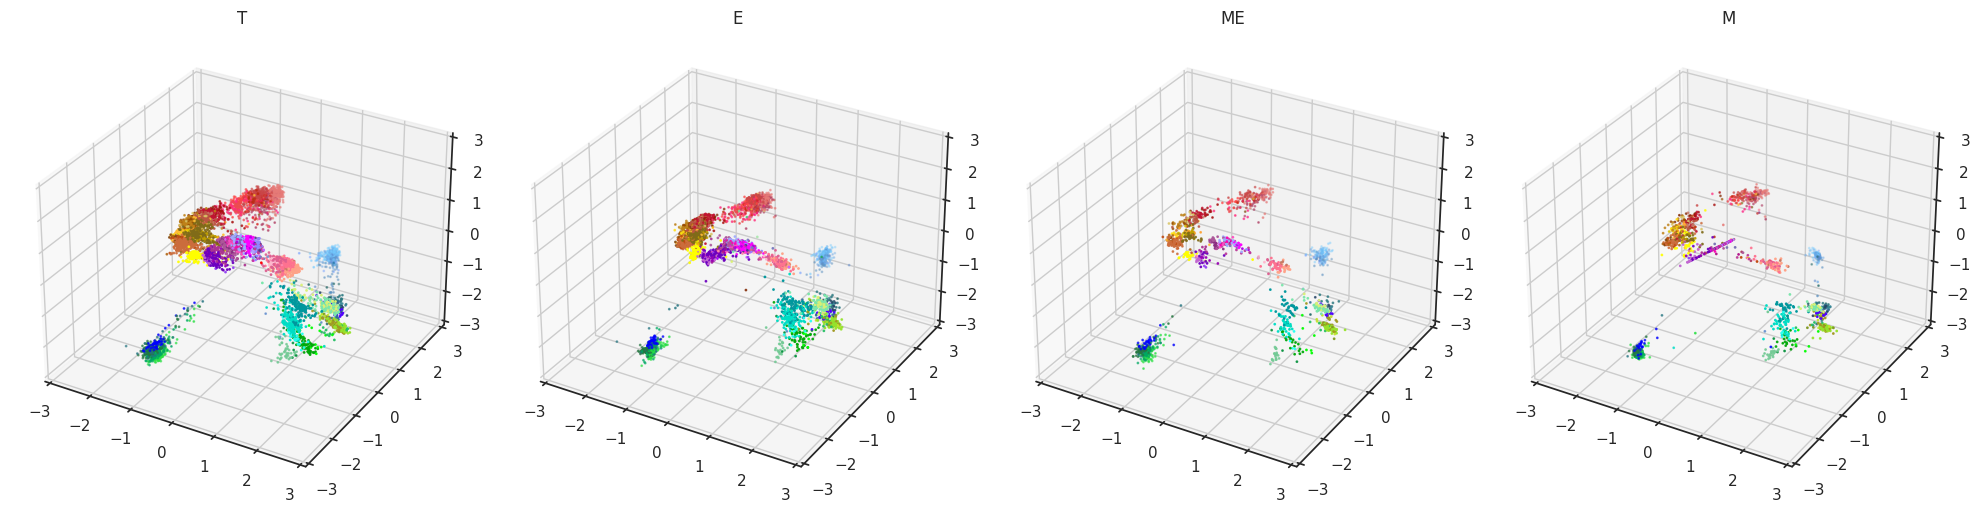

Number of t comms: 26      ,E comms: 21      ,ME comms: 21      ,M comms: 21


In [7]:
for fold in range(5):
    folder = path["ok_hyperparam_cplAEs"]
    file = f"exit_summary_fold_{fold}_test.pkl"
    dir = os.path.join(folder, file)
    output = loadpkl(dir)
    plot_z_3d(output, xlim=(-3,3), ylim=(-3, 3), zlim=(-3,3))
    print_ncomm(output)

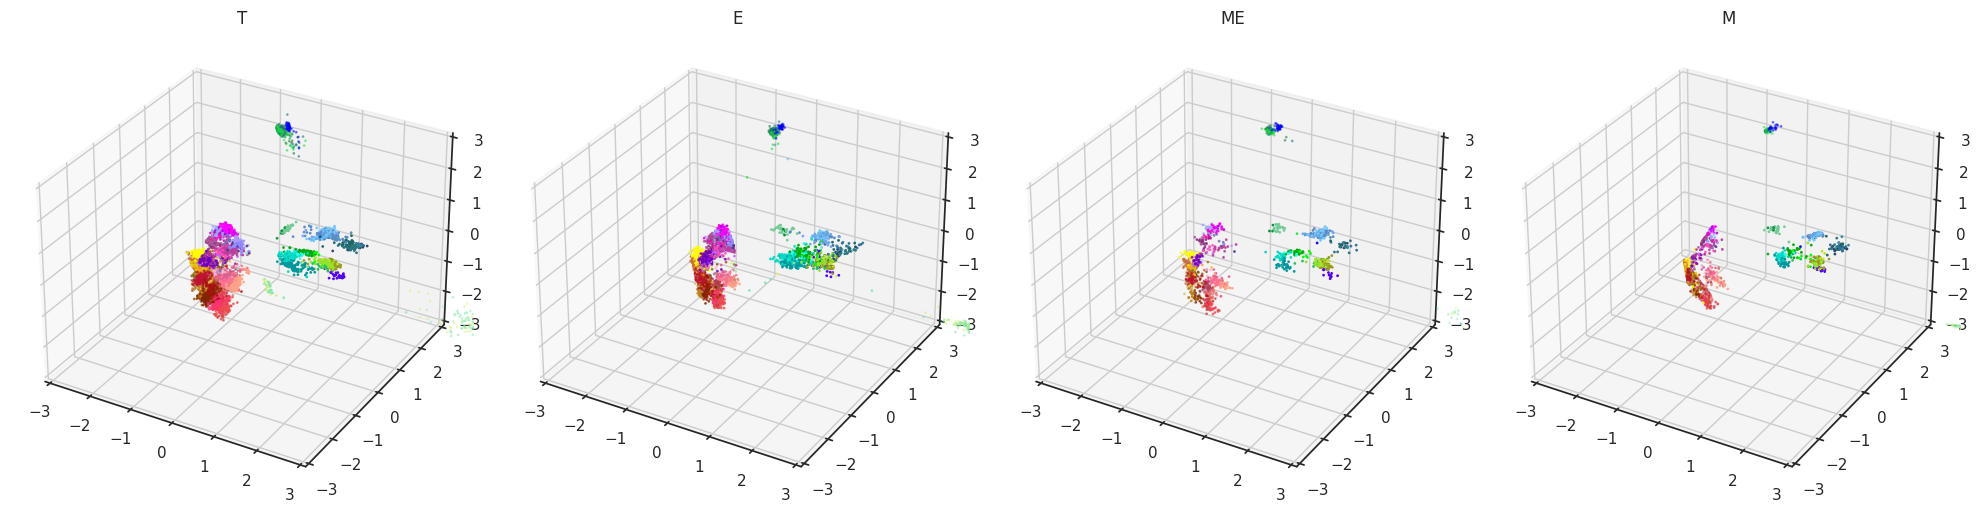

Number of t comms: 27      ,E comms: 25      ,ME comms: 21      ,M comms: 21


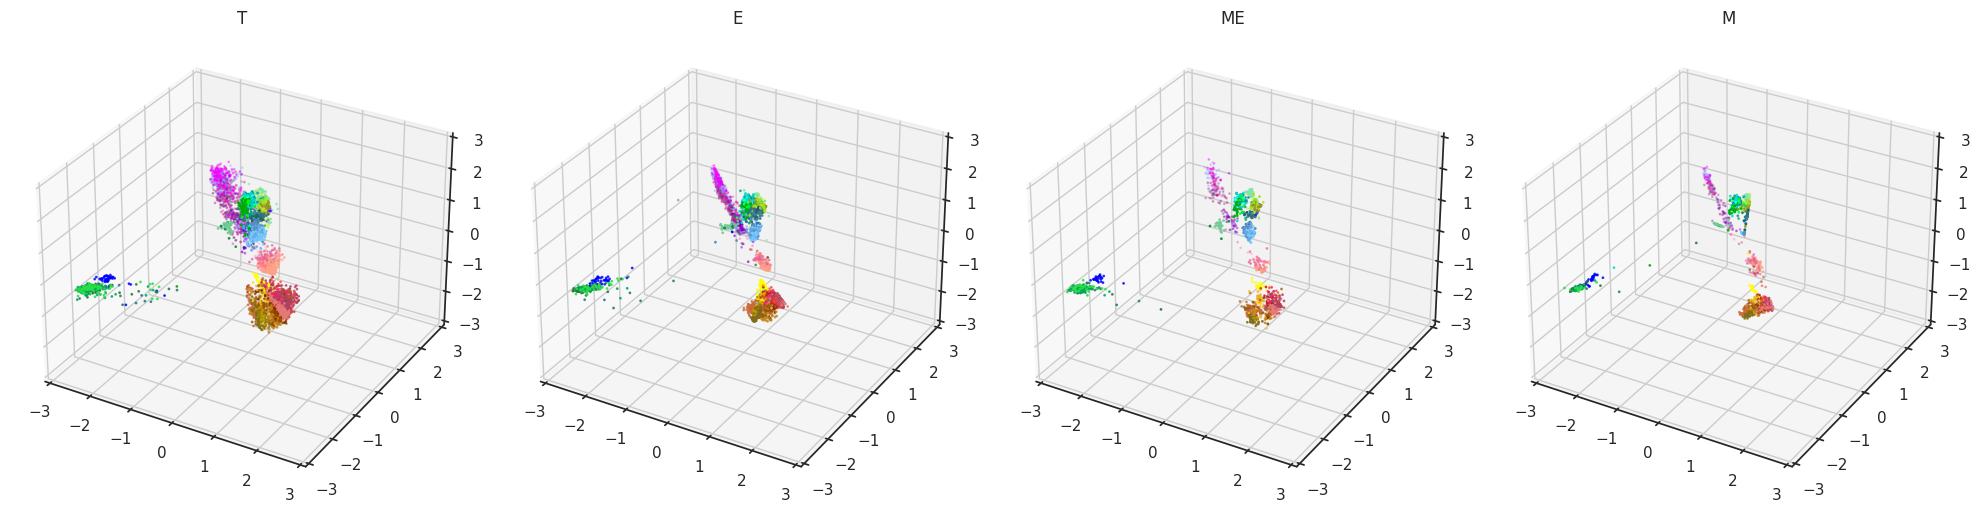

Number of t comms: 28      ,E comms: 25      ,ME comms: 20      ,M comms: 19


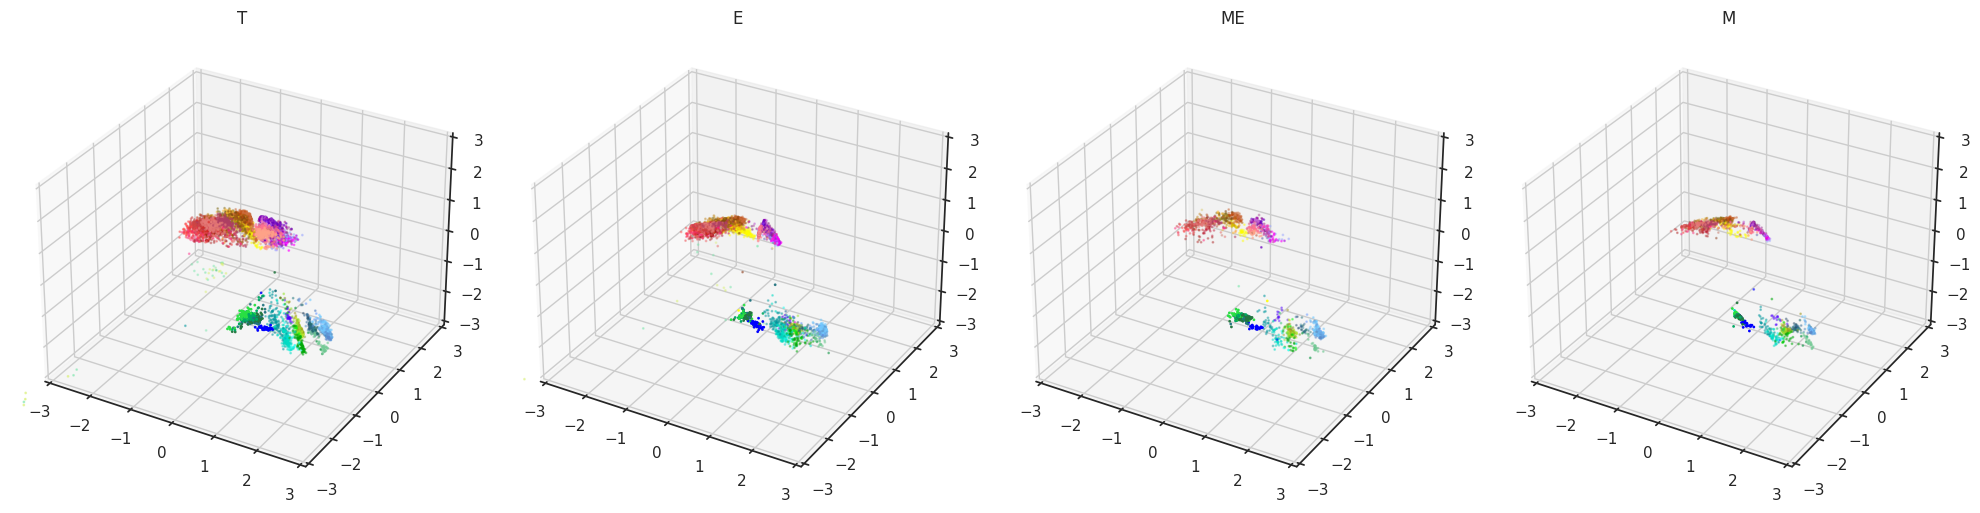

Number of t comms: 26      ,E comms: 23      ,ME comms: 21      ,M comms: 19


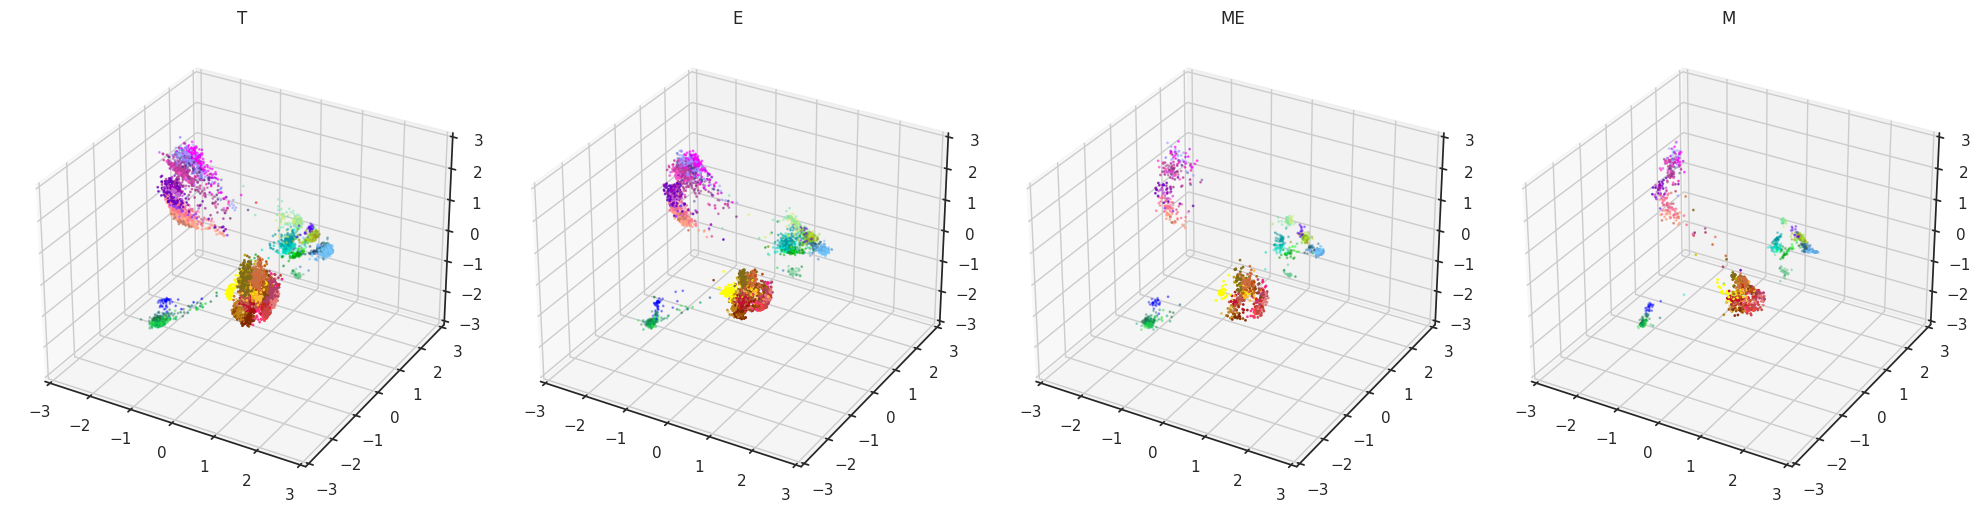

Number of t comms: 30      ,E comms: 22      ,ME comms: 19      ,M comms: 18


In [8]:
for fold in range(4):
    folder = path["good_hyperparam_cplAEs"]
    file = f"exit_summary_fold_{fold}_test.pkl"
    # file = "exit_summary_test.pkl"
    dir = os.path.join(folder, file)
    output = loadpkl(dir)
    plot_z_3d(output, xlim=(-3,3), ylim=(-3, 3), zlim=(-3,3))
    print_ncomm(output)

In [9]:
loss = {}
for exp in ["separate_AEs", "ok_hyperparam_cplAEs", "good_hyperparam_cplAEs"]:
    for mode in ["T", "E", "M"]:
        for fold in range(5):
            loss[(exp, mode, fold)] = pd.read_csv(path[exp] + get_loss_file_name(exp_names[exp], mode, fold))[["Step", "Value"]]

[]

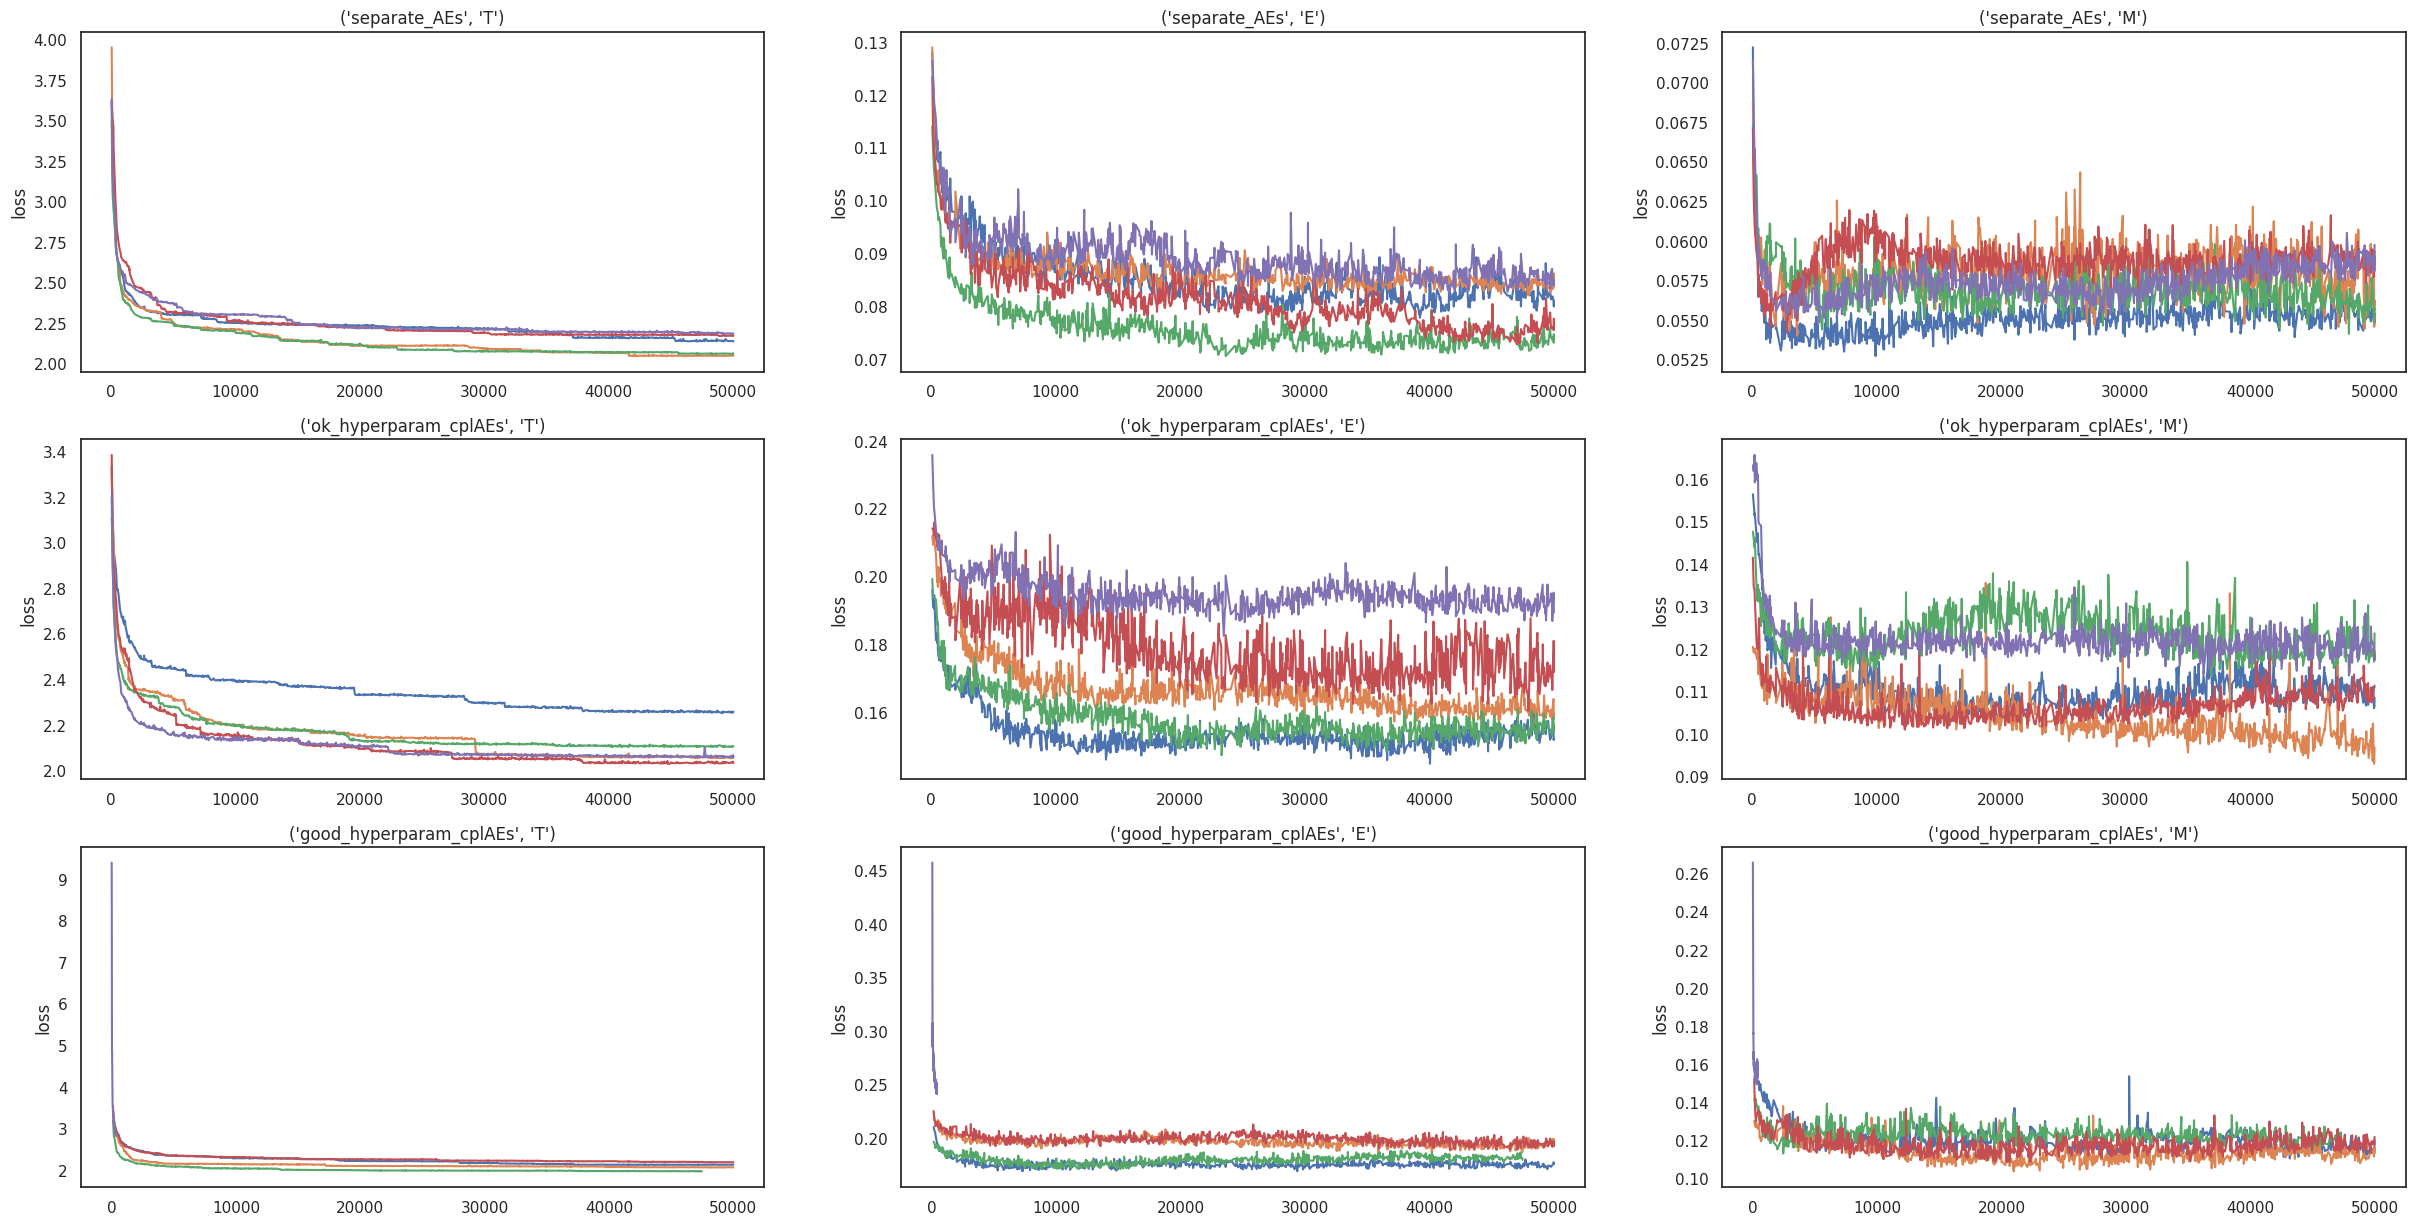

In [10]:
fig, axs = plt.subplots(3,3, figsize=(30, 15))
for i, sub_expt in enumerate(["separate_AEs", "ok_hyperparam_cplAEs", "good_hyperparam_cplAEs"]):
    for j, mode in enumerate(["T", "E", "M"]):
        for fold in range(5):
            axs[i][j].plot(loss[(sub_expt, mode, fold)]["Step"], loss[(sub_expt, mode, fold)]["Value"])
            axs[i][j].set_title((sub_expt, mode))
            axs[i][j].set_ylabel("loss")
plt.plot()

In [14]:
#get the average for each fold for each modality for the last ~20000 epochs which is the last 200 lines of the data

results = pd.DataFrame()
exps = []
modes = []
folds = []
means = []

for (exp, mode, fold),v in loss.items():
    exps.append(exp)
    modes.append(mode)
    folds.append(fold)
    means.append(np.mean(v['Value'][-200:]))

results["exp"] = exps
results["mode"] = modes
results['fold'] = folds
results['loss_mean'] = means

results

exp mode  fold  loss_mean
0             separate_AEs    T     0   2.150788
1             separate_AEs    T     1   2.050948
2             separate_AEs    T     2   2.065915
3             separate_AEs    T     3   2.177449
4             separate_AEs    T     4   2.192553
5             separate_AEs    E     0   0.082633
6             separate_AEs    E     1   0.084495
7             separate_AEs    E     2   0.073340
8             separate_AEs    E     3   0.075372
9             separate_AEs    E     4   0.085778
10            separate_AEs    M     0   0.055442
11            separate_AEs    M     1   0.057930
12            separate_AEs    M     2   0.056498
13            separate_AEs    M     3   0.058856
14            separate_AEs    M     4   0.058527
15    ok_hyperparam_cplAEs    T     0   2.258785
16    ok_hyperparam_cplAEs    T     1   2.059112
17    ok_hyperparam_cplAEs    T     2   2.106887
18    ok_hyperparam_cplAEs    T     3   2.034549
19    ok_hyperparam_cplAEs    T     4   2.062290
20    ok_hyperparam_cplAEs    E     0   0.153358
21    ok_hyperparam_cplAEs    E     1   0.161086
22    ok_hyperparam_cplAEs    E     2   0.155032
23    ok_hyperparam_cplAEs    E     3   0.174054
24    ok_hyperparam_cplAEs    E     4   0.192565
25    ok_hyperparam_cplAEs    M     0   0.110477
26    ok_hyperparam_cplAEs    M     1   0.099048
27    ok_hyperparam_cplAEs    M     2   0.120481
28    ok_hyperparam_cplAEs    M     3   0.109435
29    ok_hyperparam_cplAEs    M     4   0.121005
30  good_hyperparam_cplAEs    T     0   2.131806
31  good_hyperparam_cplAEs    T     1   2.072054
32  good_hyperparam_cplAEs    T     2   1.977361
33  good_hyperparam_cplAEs    T     3   2.200056
34  good_hyperparam_cplAEs    E     0   0.175278
35  good_hyperparam_cplAEs    E     1   0.193734
36  good_hyperparam_cplAEs    E     2   0.181856
37  good_hyperparam_cplAEs    E     3   0.195497
38  good_hyperparam_cplAEs    M     0   0.116960
39  good_hyperparam_cplAEs    M     1   0.114204
40  good_hyperparam_cplAEs    M     2   0.121375
41  good_hyperparam_cplAEs    M     3   0.119493

In [15]:
results = results.groupby(["exp", "mode"]).agg({'loss_mean' :['mean', 'std']}).reset_index()
results

exp mode loss_mean          
                                    mean       std
0  good_hyperparam_cplAEs    E  0.186591  0.009674
1  good_hyperparam_cplAEs    M  0.118008  0.003115
2  good_hyperparam_cplAEs    T  2.095319  0.094440
3    ok_hyperparam_cplAEs    E  0.167219  0.016336
4    ok_hyperparam_cplAEs    M  0.112089  0.009078
5    ok_hyperparam_cplAEs    T  2.104325  0.090200
6            separate_AEs    E  0.080323  0.005608
7            separate_AEs    M  0.057450  0.001441
8            separate_AEs    T  2.127530  0.065043

In [17]:
results.columns = ["exp", "mode", "loss_mean", "loss_std"]
results

exp mode  loss_mean  loss_std
0  good_hyperparam_cplAEs    E   0.186591  0.009674
1  good_hyperparam_cplAEs    M   0.118008  0.003115
2  good_hyperparam_cplAEs    T   2.095319  0.094440
3    ok_hyperparam_cplAEs    E   0.167219  0.016336
4    ok_hyperparam_cplAEs    M   0.112089  0.009078
5    ok_hyperparam_cplAEs    T   2.104325  0.090200
6            separate_AEs    E   0.080323  0.005608
7            separate_AEs    M   0.057450  0.001441
8            separate_AEs    T   2.127530  0.065043

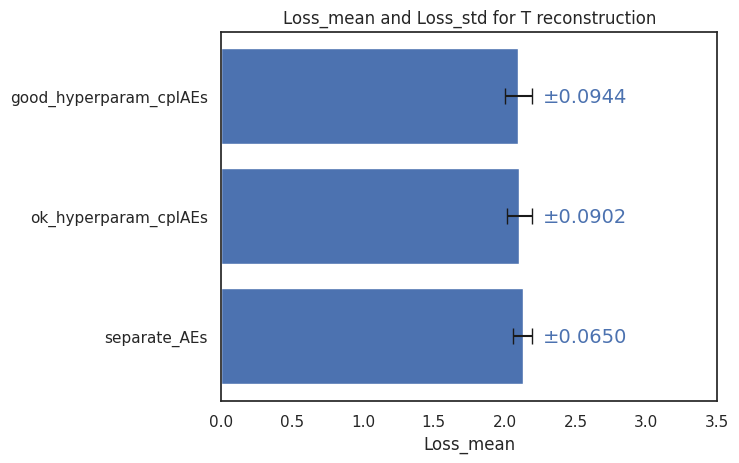

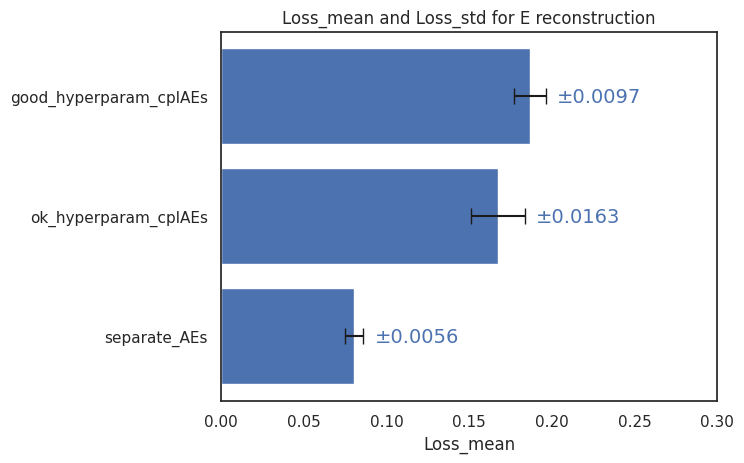

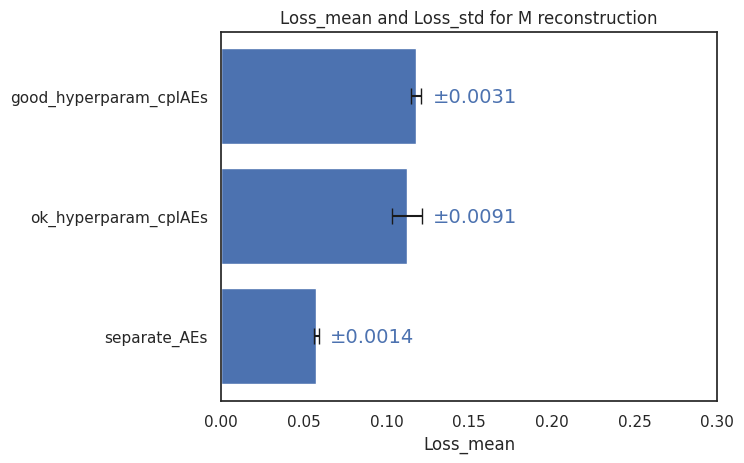

In [19]:
for mode, xlim in zip(["T", "E", "M"], [3.5, 0.3, 0.3]):
    people =  results[results['mode']==mode]['exp'].to_list()
    y_pos = np.arange(len(people))
    performance = results[results['mode']==mode]["loss_mean"].to_list()
    error = results[results['mode']==mode]["loss_std"].to_list()

    fig, ax = plt.subplots()

    hbars = ax.barh(y_pos, performance, xerr=error, align='center', capsize=6)
    ax.set_yticks(y_pos, labels=people)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Loss_mean')
    ax.set_title(f'Loss_mean and Loss_std for {mode} reconstruction')

    # Label with given captions, custom padding and annotate options
    ax.bar_label(hbars, labels=['±%.4f' % e for e in error],
                padding=8, color='b', fontsize=14)
    ax.set_xlim(right=xlim)

    plt.show()

In [43]:
output = {}

for exp in ["separate_AEs", "ok_hyperparam_cplAEs", "good_hyperparam_cplAEs"]:
    folder = path[exp]
    file = f"exit_summary_fold_0_test.pkl"
    dir = os.path.join(folder, file)
    output[exp] = loadpkl(dir)

In [46]:
output['separate_AEs'].keys()

dict_keys(['XT', 'XM', 'XE', 'XrT', 'XrE', 'XrM', 'XrM_me_paired', 'XrE_me_paired', 'specimen_id', 'cluster_label', 'cluster_color', 'cluster_id', 'gene_ids', 'e_features', 'loss_rec_xt', 'loss_rec_xe', 'loss_rec_xm', 'loss_rec_xme_paired', 'loss_cpl_me->t', 'loss_cpl_t->me', 'loss_cpl_me->m', 'loss_cpl_m->me', 'loss_cpl_me->e', 'loss_cpl_e->me', 'loss_cpl_t->e', 'loss_cpl_e->t', 'loss_cpl_t->m', 'loss_cpl_m->t', 'loss_cpl_e->m', 'loss_cpl_m->e', 'zm', 'ze', 'zt', 'zme_paired', 'is_t_1d', 'is_e_1d', 'is_m_1d'])

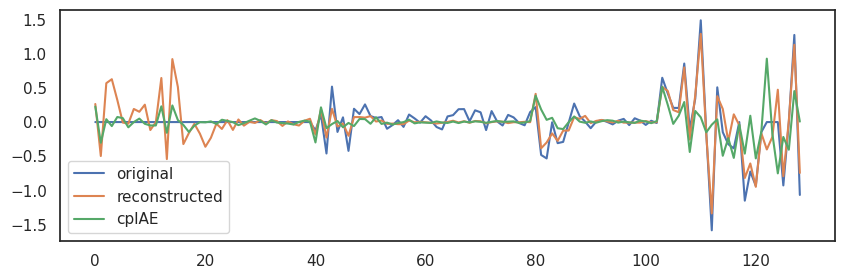

In [61]:
plt.figure(figsize=(10,3))
plt.plot(output['separate_AEs']['XM'][output['separate_AEs']['is_m_1d']][100], label="original")
plt.plot(output['separate_AEs']['XrM'][output['separate_AEs']['is_m_1d']][100], label="reconstructed")
plt.plot(output['good_hyperparam_cplAEs']['XrM'][output['good_hyperparam_cplAEs']['is_m_1d']][100], label="cplAE")
plt.legend()
plt.show()

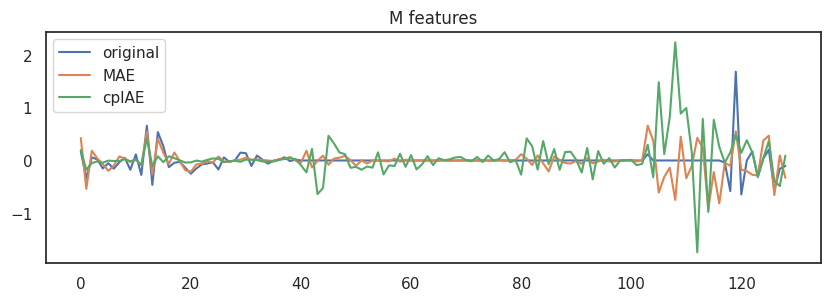

In [64]:
plt.figure(figsize=(10,3))
plt.title("M features")
plt.plot(output['separate_AEs']['XM'][output['separate_AEs']['is_m_1d']][1200], label="original")
plt.plot(output['separate_AEs']['XrM'][output['separate_AEs']['is_m_1d']][1200], label="MAE")
plt.plot(output['good_hyperparam_cplAEs']['XrM'][output['good_hyperparam_cplAEs']['is_m_1d']][1200], label="cplAE")
plt.legend()
plt.show()